##### 1.Utilize the diabetes dataset from lab 4. Perform cross-validation on nine polynomial models, ranging from degree 0 to 8

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [35]:

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Define the degrees for polynomial models
degrees = list(range(9))

# Initializing lists to store results
r_squared = []
mae = []
mape = []

for degree in degrees:
    # Creating polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Linear Regression model
    model = LinearRegression()

    # scorers for metrics
    scorers = {
        'r2': make_scorer(r2_score),
        'mae': make_scorer(mean_absolute_error),
        'mape': make_scorer(mean_absolute_percentage_error)
    }

    # Performing cross-validation for each metric
    cv_r2 = cross_val_score(model, X_poly, y, cv=5, scoring=scorers['r2'])
    cv_mae = cross_val_score(model, X_poly, y, cv=5, scoring=scorers['mae'])
    cv_mape = cross_val_score(model, X_poly, y, cv=5, scoring=scorers['mape'])

    # Calculating the mean for each metric
    mean_r2 = cv_r2.mean()
    mean_mae = -cv_mae.mean()  # Negate for positive MAE
    mean_mape = -cv_mape.mean()  # Negate for positive MAPE

    # Adding results to the respective lists
    r_squared.append(mean_r2)
    mae.append(mean_mae)
    mape.append(mean_mape)

# Createing a DataFrame to store the results
results_df = pd.DataFrame({
    'Degree': degrees,
    'R-Squared': r_squared,
    'Mean Absolute Error (MAE)': mae,
    'Mean Absolute Percentage Error (MAPE)': mape
})


#### 2.Construct a table summarizing the cross-validation results. Each model should have a separate row in the table. Include the R-Squared, Mean Absolute Error (MAE) and MAPE metrics for each model. Calculate the mean value and standard deviation of these metrics from the cross-validation. Include both values.

In [34]:

# Displaying the results
display(results_df)


,Degree,R-Squared,R-Squared Std Dev,MAE,MAE Std Dev,MAPE,MAPE Std Dev
0,0,-0.027506,0.036772,-66.045624,3.474660,-0.623622,0.065610
1,1,0.482316,0.049269,-44.276499,2.100110,-0.394860,0.029602
2,2,0.391502,0.120519,-46.612882,2.192124,-0.402669,0.029594
3,3,-181.520036,229.329786,-342.740488,140.082337,-2.327479,0.827285
4,4,-70.667516,53.160839,-303.158461,39.359835,-2.453685,0.375148
5,5,-67.387407,50.797106,-295.686026,37.255902,-2.405233,0.352594
6,6,-67.447482,50.957110,-295.631865,37.280642,-2.404954,0.353004
7,7,-67.448529,50.959410,-295.630403,37.281440,-2.404952,0.353014
8,8,-67.442248,50.964952,-295.580633,37.272044,-2.404587,0.352654


In [23]:
# Calculating the mean value for each metric
mean_r2 = results_df['R-Squared'].mean()
mean_mae = results_df['MAE'].mean()
mean_mape = results_df['MAPE'].mean()

# Calculating the standard deviation for each metric
std_r2 = results_df['R-Squared Std Dev'].mean()
std_mae = results_df['MAE Std Dev'].mean()
std_mape = results_df['MAPE Std Dev'].mean()

# Displaying the mean and standard deviation values
print("Mean R-Squared:", mean_r2)
print("Mean MAE:", mean_mae)
print("Mean MAPE:", mean_mape)

print("Standard Deviation R-Squared:", std_r2)
print("Standard Deviation MAE:", std_mae)
print("Standard Deviation MAPE:", std_mape)

Mean R-Squared: -57.896322824425965
Mean MAE: -220.59587552819403
Mean MAPE: -1.7580045544607315
Standard Deviation R-Squared: 54.04175141250525
Standard Deviation MAE: 37.366566270313484
Standard Deviation MAPE: 0.3042782824924808


#### 3.Identification of the Best Model: Identify the model that exhibits the highest performance based on the R-Squared, MAE and MAPE metrics. Provide an explanation for choosing this specific model.

In [24]:
# Finding the model with the highest R-squared and lowest MAE and MAPE
best_r2_model = results_df['Degree'][results_df['R-Squared'].idxmax()]
best_mae_model = results_df['Degree'][results_df['MAE'].idxmin()]
best_mape_model = results_df['Degree'][results_df['MAPE'].idxmin()]

# Displaying the best models based on each metric
print("Best Model (Highest R-Squared): Degree", best_r2_model)
print("Best Model (Lowest MAE): Degree", best_mae_model)
print("Best Model (Lowest MAPE): Degree", best_mape_model)


Best Model (Highest R-Squared): Degree 1
Best Model (Lowest MAE): Degree 3
Best Model (Lowest MAPE): Degree 4


#### 4.Additional analysis and interpretation of the models' performances. You may explore further insights beyond the required metrics. The analysis should provide at least one relevant insight about the choice of the best model, or about characteristics of the chosen one (for example - an analysis of in which instances does it fail)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

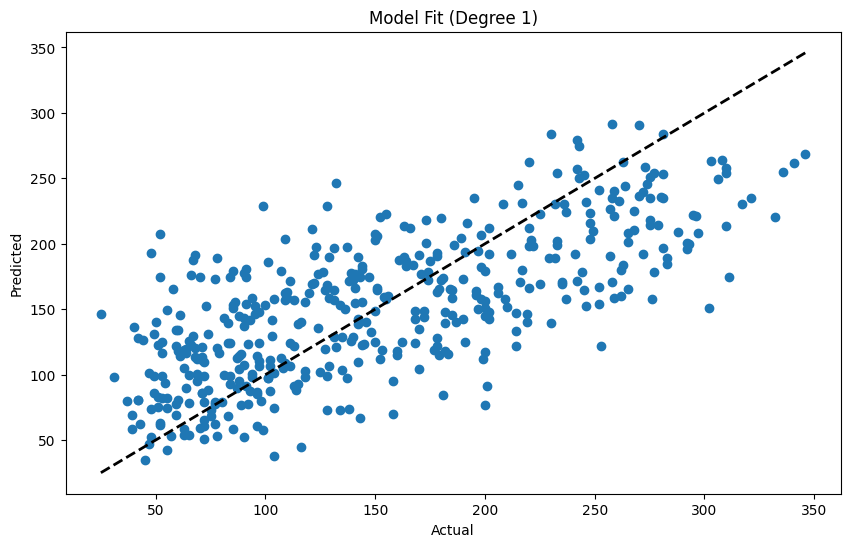

In [30]:
# Visualizing the fit of the best model based on R-squared
best_degree = best_r2_model
poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Model Fit (Degree {best_degree})")
plt.show()

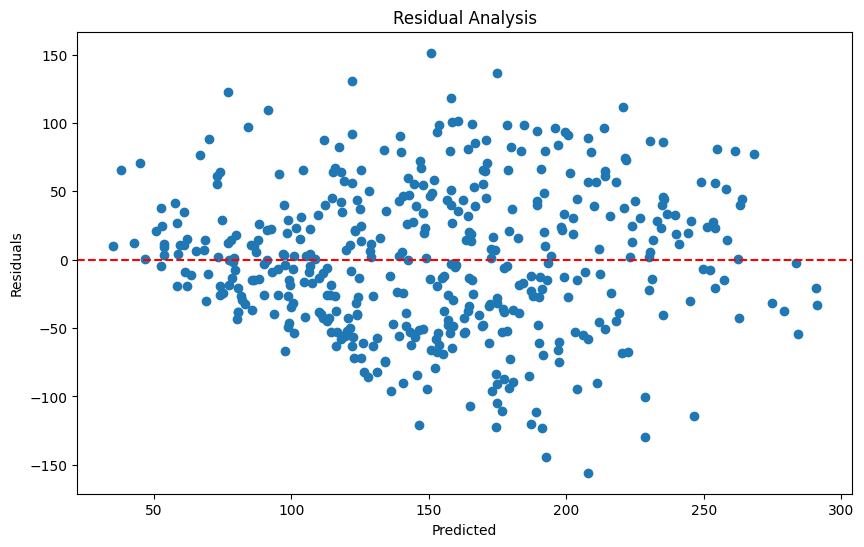

In [31]:
# Residual Analysis
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()

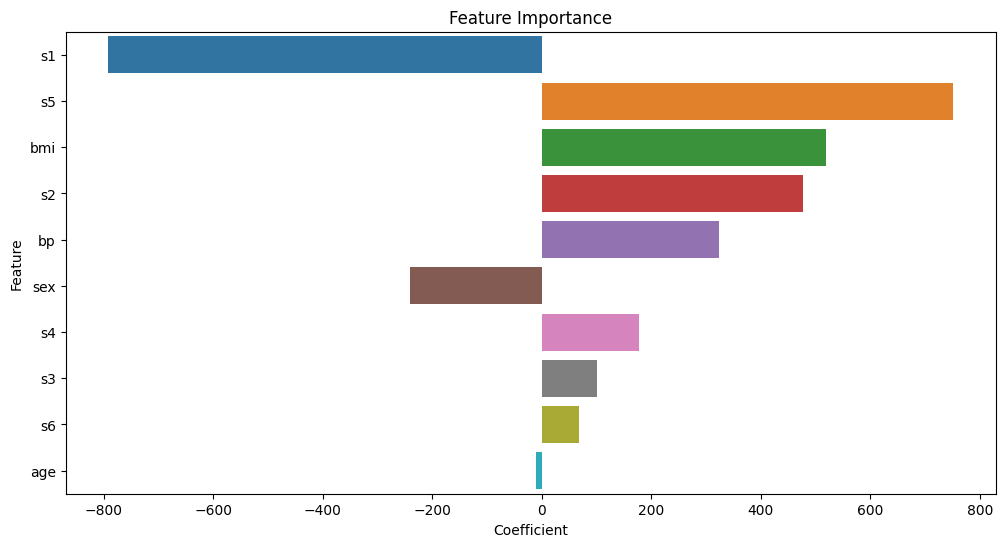

In [32]:
# Featuring Importance for Polynomial Model
coef = model.coef_
original_feature_names = diabetes.feature_names
feature_importance_df = pd.DataFrame({'Feature': original_feature_names, 'Coefficient': coef[1:]})
feature_importance_df = feature_importance_df.reindex(feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df)
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

Degree 1 provides a balance between goodness of fit and model simplicity, while degree 3 and 4 provide excellent accuracy but exhibit extreme metrics.

Degree 1 has the highest R-squared value.A high R-squared suggests that the linear model fits the data well. It indicates that the model's predictions closely align with the actual disease progression values in the dataset.

Degree 1 corresponds to a simple linear model, which is easy to interpret and computationally efficient.